In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] hgu219.db_3.2.3       org.Hs.eg.db_3.14.0   forcats_0.5.2        
 [4] stringr_1.5.0         dplyr_1.1.0           purrr_1.0.1          
 [7] readr_2.1.3           tidyr_1.3.0           tibble_3.1.7         
[10] ggplot2_3.3.6         tidyverse_1.3.2       AnnotationDbi_1.56.2 


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(hgu219.db)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [3]:
load(file = "./pairwise_RData_files/pairwise_WGCNA_ADNI_allSubjects-01-dataInput.RData")
load(file = "./pairwise_RData_files/20230418_MCI_AD_limmaCorrected-02-networkConstruction-stepByStep.RData")
load(file = "./pairwise_RData_files/datExpr_MCI_AD_limmaCorrected_selectHVGs.RData")

In [4]:
ls()

[1] "datExpr_CN_AD.gender_rin_corrected"  "datExpr_CN_MCI.gender_rin_corrected"
 [3] "datExpr_MCI_AD_selectHVGs"           "datExpr_MCI_AD.gender_rin_corrected"
 [5] "datTraits_CN_AD"                     "datTraits_CN_MCI"                   
 [7] "datTraits_MCI_AD"                    "geneTree_MCI_AD"                    
 [9] "MEs_MCI_AD"                          "moduleColors_MCI_AD"                
[11] "moduleLabels_MCI_AD"

## Quantifying module-trait associations

In [5]:
# Define numbers of genes and samples
nGenes_MCI_AD <- ncol(datExpr_MCI_AD_selectHVGs)
nSamples_MCI_AD <- nrow(datExpr_MCI_AD_selectHVGs)

# Recalculate MEs with color labels
MEs0_MCI_AD = moduleEigengenes(datExpr_MCI_AD_selectHVGs, moduleColors_MCI_AD)$eigengenes
MEs_MCI_AD = orderMEs(MEs0_MCI_AD)
moduleTraitCor_MCI_AD = cor(MEs_MCI_AD, datTraits_MCI_AD, use = "p");
moduleTraitPvalue_MCI_AD = corPvalueStudent(moduleTraitCor_MCI_AD, nSamples_MCI_AD);

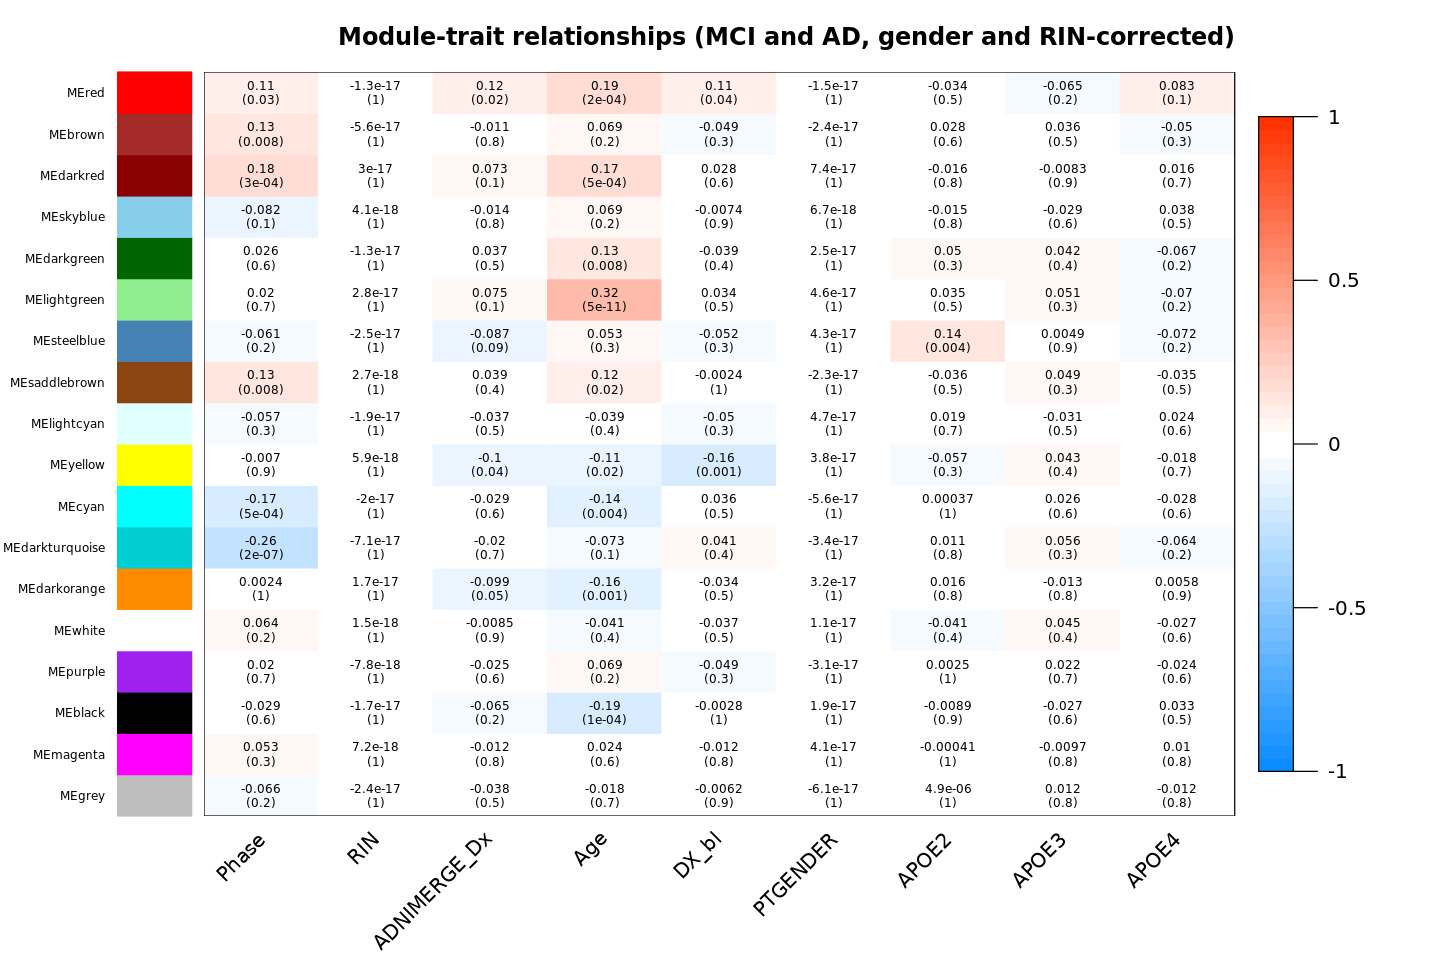

In [6]:
# sizeGrWindow(12,9)
options(repr.plot.width = 12, repr.plot.height = 8)
# Will display correlations and their p-values
textMatrix_MCI_AD = paste(signif(moduleTraitCor_MCI_AD, 2), "\n(",
                                        signif(moduleTraitPvalue_MCI_AD, 1), ")", sep = "");
dim(textMatrix_MCI_AD) = dim(moduleTraitCor_MCI_AD)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_MCI_AD,
               xLabels = names(datTraits_MCI_AD),
               yLabels = names(MEs_MCI_AD),
               ySymbols = names(MEs_MCI_AD),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_MCI_AD,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (MCI and AD, gender and RIN-corrected)"))

In [7]:
pdf(file = "pairwise_plots/MCI_AD_moduleTraitCor.pdf", 
    width = 12, height = 9)

textMatrix_MCI_AD = paste(signif(moduleTraitCor_MCI_AD, 2), "\n(",
                                        signif(moduleTraitPvalue_MCI_AD, 1), ")", sep = "");
dim(textMatrix_MCI_AD) = dim(moduleTraitCor_MCI_AD)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_MCI_AD,
               xLabels = names(datTraits_MCI_AD),
               yLabels = names(MEs_MCI_AD),
               ySymbols = names(MEs_MCI_AD),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_MCI_AD,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (MCI and AD, gender and RIN-corrected)"))

dev.off()

png 
  2

## Gene relationship to trait and important modules

In [8]:
# Define variable diagnosis containing diagnosis column of datTrait
diagnosis  <- as.data.frame(datTraits_MCI_AD$ADNIMERGE_Dx)
names(diagnosis) <- "diagnosis"

In [9]:
# names (colors) of the modules
modNames_MCI_AD = substring(names(MEs_MCI_AD), 3)
modNames_MCI_AD

[1] "red"           "brown"         "darkred"       "skyblue"      
 [5] "darkgreen"     "lightgreen"    "steelblue"     "saddlebrown"  
 [9] "lightcyan"     "yellow"        "cyan"          "darkturquoise"
[13] "darkorange"    "white"         "purple"        "black"        
[17] "magenta"       "grey"

In [10]:
geneModuleMembership_MCI_AD <- as.data.frame(cor(datExpr_MCI_AD_selectHVGs, 
                                                MEs_MCI_AD, use = "p"))
MMPvalue_MCI_AD <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_MCI_AD), 
                                                 nSamples_MCI_AD))

names(geneModuleMembership_MCI_AD) = paste("MM", modNames_MCI_AD, sep="");
names(MMPvalue_MCI_AD) = paste("p.MM", modNames_MCI_AD, sep="");

In [11]:
geneTraitSignificance_MCI_AD.diagnosis = as.data.frame(cor(datExpr_MCI_AD_selectHVGs, diagnosis, use = "p"));

GSPvalue_MCI_AD.diagnosis = as.data.frame(
    corPvalueStudent(as.matrix(geneTraitSignificance_MCI_AD.diagnosis), nSamples_MCI_AD));

names(geneTraitSignificance_MCI_AD.diagnosis) = paste("GS.", names(diagnosis), sep="");
names(GSPvalue_MCI_AD.diagnosis) = paste("p.GS.", names(diagnosis), sep="");

In [13]:
# convert probe names to gene symbols
vector_datExpr_MCI_AD_geneSymbols <- rep(0, length = ncol(datExpr_MCI_AD_selectHVGs))

vector_datExpr_MCI_AD_geneSymbols <- AnnotationDbi::mapIds(hgu219.db,
                                                          keys = datExpr_MCI_AD_selectHVGs %>% colnames,
                                                          column = "SYMBOL",
                                                          keytype = "PROBEID",
                                                          multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [14]:
df_datExpr_MCI_AD_geneSymbols <- data.frame(vector_datExpr_MCI_AD_geneSymbols)
colnames(df_datExpr_MCI_AD_geneSymbols) <- c("geneSymbol")

df_datExpr_MCI_AD_geneSymbols %>% head

,geneSymbol
,<chr>
11756083_x_at,HLA-DQA1
11732801_at,SIRPB1
11755998_x_at,HLA-DRB4
11760799_x_at,HLA-DPB1
11732800_a_at,SIRPB1
11752660_a_at,SIRPB1


In [15]:
# Create the starting data frame
geneInfo0_MCI_AD_diagnosis = data.frame(geneProbe = rownames(df_datExpr_MCI_AD_geneSymbols),
                                       geneSymbol = df_datExpr_MCI_AD_geneSymbols$geneSymbol,
                                       moduleColor = moduleColors_MCI_AD,
                                       geneTraitSignificance_MCI_AD.diagnosis,
                                       GSPvalue_MCI_AD.diagnosis)

# Order modules by their significance for weight
modOrder_MCI_AD_diagnosis = order(-abs(cor(MEs_MCI_AD, diagnosis, use = "p")));
# Add module membership information in the chosen order
for (mod in 1:ncol(geneModuleMembership_MCI_AD))
{
    oldNames_diagnosis = names(geneInfo0_MCI_AD_diagnosis)
    geneInfo0_MCI_AD_diagnosis = data.frame(geneInfo0_MCI_AD_diagnosis, geneModuleMembership_MCI_AD[, modOrder_MCI_AD_diagnosis[mod]],
                                     MMPvalue_MCI_AD[, modOrder_MCI_AD_diagnosis[mod]]);
    names(geneInfo0_MCI_AD_diagnosis) = c(oldNames_diagnosis, paste("MM.", modNames_MCI_AD[modOrder_MCI_AD_diagnosis[mod]], sep=""),
                                   paste("p.MM.", modNames_MCI_AD[modOrder_MCI_AD_diagnosis[mod]], sep=""))
}
# Order the genes in the geneInfo variable first by module color, then by geneTraitSignificance
geneOrder_MCI_AD_diagnosis = order(geneInfo0_MCI_AD_diagnosis$moduleColor, -abs(geneInfo0_MCI_AD_diagnosis$GS.diagnosis));
geneInfo_MCI_AD_diagnosis = geneInfo0_MCI_AD_diagnosis[geneOrder_MCI_AD_diagnosis, ]

In [16]:
geneInfo_MCI_AD_diagnosis %>% head

,geneProbe,geneSymbol,moduleColor,GS.diagnosis,p.GS.diagnosis,MM.red,p.MM.red,MM.yellow,p.MM.yellow,MM.darkorange,⋯,MM.darkturquoise,p.MM.darkturquoise,MM.skyblue,p.MM.skyblue,MM.magenta,p.MM.magenta,MM.brown,p.MM.brown,MM.white,p.MM.white
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11727514_at,11727514_at,TTC9,black,-0.1566289,0.001818452,-0.3224983,5.487112e-11,-0.066469939,0.18795426,0.3079727,⋯,0.10446163,3.821049e-02,-0.007330458,0.8846753,0.003769083,9.405515e-01,0.14116586,4.996954e-03,0.06029146,0.23246412
11730321_a_at,11730321_a_at,CLEC2D,black,-0.1449246,0.003942006,-0.5854961,1.268793e-37,-0.021891274,0.66486897,0.3927199,⋯,0.24495418,8.569190e-07,-0.047670481,0.3452911,0.263112941,1.159831e-07,0.08590006,8.860572e-02,0.06043900,0.23132111
11733194_s_at,11733194_s_at,FMNL3,black,-0.1326423,0.008384825,-0.2701086,5.150811e-08,-0.006741838,0.89387863,0.2278921,⋯,-0.03111707,5.379982e-01,0.064620080,0.2005681,0.295091911,2.339222e-09,0.09183784,6.860880e-02,0.03327673,0.51014753
11732447_x_at,11732447_x_at,EXOG,black,-0.1264694,0.011989053,-0.2108365,2.451609e-05,-0.098967888,0.04964192,0.2146823,⋯,0.13288024,8.267679e-03,0.021779275,0.6664801,0.484774306,1.296948e-24,-0.25094480,4.505456e-07,0.02868891,0.57019373
11751916_a_at,11751916_a_at,KIAA0586,black,-0.1249507,0.013062719,-0.2992725,1.352922e-09,-0.063777357,0.20651424,0.2803953,⋯,0.11691929,2.026662e-02,0.025980011,0.6071563,0.127249966,1.146818e-02,0.14768061,3.301351e-03,0.07687851,0.12765822
11754898_a_at,11754898_a_at,ZNF573,black,-0.1247729,0.013193779,-0.2589046,1.869036e-07,-0.025941150,0.60769427,0.4193036,⋯,-0.01391521,7.830514e-01,-0.006387366,0.8994279,0.614275193,3.082228e-42,0.11040510,2.843598e-02,0.08990380,0.07467089


In [17]:
write.csv(geneInfo_MCI_AD_diagnosis, file = "pairwise_csv_files/geneInfo_MCI_AD.csv")

In [18]:
entrezCodes_MCI_AD <- AnnotationDbi::mapIds(hgu219.db,
                                           keys = datExpr_MCI_AD_selectHVGs %>% colnames,
                                           column = "ENTREZID",
                                           keytype = "PROBEID",
                                           multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [19]:
GOenr_MCI_AD_diagnosis = GOenrichmentAnalysis(moduleColors_MCI_AD, entrezCodes_MCI_AD, organism = "human", nBestP = 10);

Warning message in GOenrichmentAnalysis(moduleColors_MCI_AD, entrezCodes_MCI_AD, :
“This function is deprecated and will be removed in the near future. 
We suggest using the replacement function enrichmentAnalysis 
in R package anRichment, available from the following URL:
https://labs.genetics.ucla.edu/horvath/htdocs/CoexpressionNetwork/GeneAnnotation/”
Loading required package: GO.db



 GOenrichmentAnalysis: loading annotation data...
  ..of the 10020  Entrez identifiers submitted, 9719 are mapped in current GO categories.
  ..will use 9719 background genes for enrichment calculations.
  ..preparing term lists (this may take a while).. 
  ..working on label set 1 ..
    ..calculating enrichments (this may also take a while)..
    ..putting together terms with highest enrichment significance..


In [20]:
tab_MCI_AD_diagnosis = GOenr_MCI_AD_diagnosis$bestPTerms[[4]]$enrichment

In [21]:
tab_MCI_AD_diagnosis %>% head

,module,modSize,bkgrModSize,rank,enrichmentP,BonferoniP,nModGenesInTerm,fracOfBkgrModSize,fracOfBkgrTermSize,bkgrTermSize,termID,termOntology,termName,termDefinition
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
GO:0050863,black,379,374,1,1.912138e-05,0.3555238,23,0.06149733,0.10176991,226,GO:0050863,BP,regulation of T cell activation,"Any process that modulates the frequency, rate or extent of T cell activation."
GO:1903039,black,379,374,2,1.995491e-05,0.3710217,19,0.05080214,0.11445783,166,GO:1903039,BP,positive regulation of leukocyte cell-cell adhesion,NA
GO:0022409,black,379,374,3,3.285888e-05,0.6109451,20,0.05347594,0.10695187,187,GO:0022409,BP,positive regulation of cell-cell adhesion,Any process that activates or increases the rate or extent of cell adhesion to another cell.
GO:1903037,black,379,374,4,5.359295e-05,0.9964537,22,0.05882353,0.09777778,225,GO:1903037,BP,regulation of leukocyte cell-cell adhesion,NA
GO:0050870,black,379,374,5,5.667278e-05,1.0000000,17,0.04545455,0.11409396,149,GO:0050870,BP,positive regulation of T cell activation,"Any process that activates or increases the frequency, rate or extent of T cell activation."
GO:0007159,black,379,374,6,7.302549e-05,1.0000000,23,0.06149733,0.09349593,246,GO:0007159,BP,leukocyte cell-cell adhesion,The attachment of a leukocyte to another cell via adhesion molecules.


In [22]:
write.table(tab_MCI_AD_diagnosis, file = "pairwise_csv_files/GOEnrichmentTable_MCI_AD.csv", sep = ",", quote = TRUE, row.names = FALSE)